# <span style="color:midnightblue"> *Práctica 6 – Regresión Logística*</span>
### *Análisis Estadístico Multivariable – Primavera 2025*


Prof. Luis Alvarado

Clara Paola Aguilar Casillas

Daniela de la Torre Gallo

Aissa Berenice Gonzalez Fosado

<img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-SinFondo.png"  width="300">

In [13]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

In [14]:
#importar datos
data = pd.read_csv(r"C:\Users\Daniela de la Torre\OneDrive\Escritorio\4to_Semestre\Analisis Estadistico Multivariado\diabetes_dataset.csv")
#Quitar valores nulos
data = data.dropna()
print(data.shape)

(100000, 8)


In [15]:
data.head()

,gender,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,32.0,0,0,27.32,5.0,100,0
1,Female,29.0,0,0,19.95,5.0,90,0
2,Male,18.0,0,0,23.76,4.8,160,0
3,Male,41.0,0,0,27.32,4.0,159,0
4,Female,52.0,0,0,23.75,6.5,90,0


In [16]:
#Pasamos los valores de género a dummies
map_gender = {valor: idx for idx, valor in enumerate(data['gender'].unique(), start=1)}
data['gender'] = data['gender'].map(map_gender)
print(data['gender'])

0        1
1        1
2        2
3        2
4        1
        ..
99995    1
99996    1
99997    2
99998    1
99999    2
Name: gender, Length: 100000, dtype: int64


C:\Users\Daniela de la Torre\AppData\Local\Temp\ipykernel_304\2333556984.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(['0', '1'])


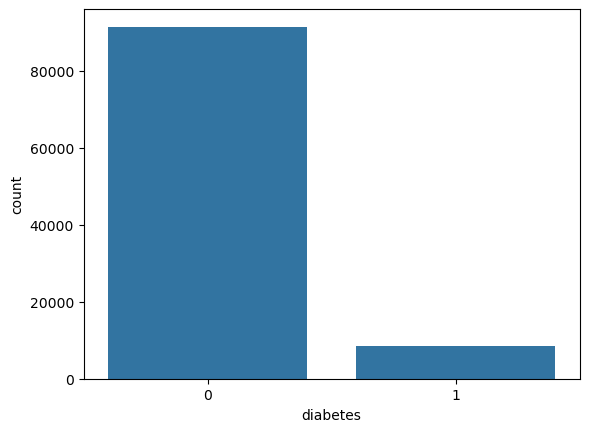

In [17]:
grafico = sns.countplot(x=data['diabetes'])
grafico.set_xticklabels(['0', '1'])
plt.show()

In [18]:
def dqr(data):
    cols = pd.DataFrame(data.columns, columns=['Name'])
    cols.set_index('Name', inplace=True)
    dtyp = pd.DataFrame(data.dtypes, columns=['Type'])
    misval = pd.DataFrame(data.isnull().sum(), columns=['N/A value'])
    presval = pd.DataFrame(data.count(), columns=['Count values'])
    unival = pd.DataFrame(data.nunique(), columns=['Unique values'])
    minval = pd.DataFrame(data.min(), columns=['Min'])
    maxval = pd.DataFrame(data.max(), columns=['Max'])
    mean = pd.DataFrame(data.mean(), columns=['Mean'])
    Std = pd.DataFrame(data.std(), columns=['Std'])
    Var = pd.DataFrame(data.var(), columns=['Var'])
    median = pd.DataFrame(data.median(), columns=['Median'])
    skewness = pd.DataFrame(data.skew(), columns=['Skewness'])
    kurtosis = pd.DataFrame(data.kurtosis(), columns=['Kurtosis'])

    resumen = cols.join([dtyp, misval, presval, unival, minval, maxval, mean, Std, Var, median, skewness, kurtosis])
    return resumen

resumen = dqr(data)
resumen

,Type,N/A value,Count values,Unique values,Min,Max,Mean,Std,Var,Median,Skewness,Kurtosis
Name,,,,,,,,,,,,
gender,int64,0,100000,3,1.00,3.00,1.414660,0.493031,0.243080,1.00,0.350954,-1.864707
age,float64,0,100000,102,0.08,80.00,41.885856,22.516840,507.008078,43.00,-0.051979,-1.003835
hypertension,int64,0,100000,2,0.00,1.00,0.074850,0.263150,0.069248,0.00,3.231296,8.441441
heart_disease,int64,0,100000,2,0.00,1.00,0.039420,0.194593,0.037866,0.00,4.733872,20.409952
bmi,float64,0,100000,4247,10.01,95.69,27.320767,6.636783,44.046894,27.32,1.043836,3.520772
hbA1c_level,float64,0,100000,18,3.50,9.00,5.527507,1.070672,1.146339,5.80,-0.066854,0.215392
blood_glucose_level,int64,0,100000,18,80.00,300.00,138.058060,40.708136,1657.152341,140.00,0.821655,1.737624
diabetes,int64,0,100000,2,0.00,1.00,0.085000,0.278883,0.077776,0.00,2.976217,6.858005


diabetes
0    91500
1     8500
Name: count, dtype: int64


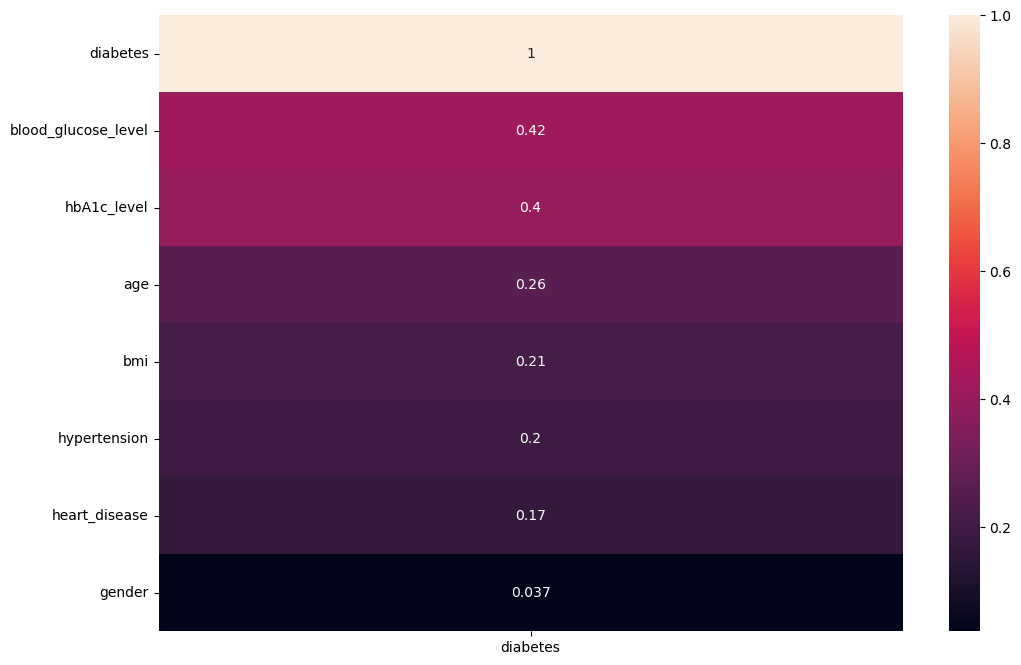

In [19]:

# Convertir columnas categóricas a variables dummy
data = pd.get_dummies(data, drop_first=True)

# Ver la distribución de la variable de salida
print(data['diabetes'].value_counts())

# Análisis de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr()[['diabetes']].sort_values(by='diabetes', ascending=False), annot=True)
plt.show()

In [20]:
data.corr()

,gender,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,-0.022994,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
hbA1c_level,0.019957,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [21]:
# Variables independiente, se trabajarán con las que tienen menor correlación con la dependiente
X = data[['age','hbA1c_level','blood_glucose_level', 'gender']]

# Variable dependiente
y = data['diabetes']

Coeficientes del modelo: [[ 0.05892986  2.3096492   0.03083716 -0.10156304]]
Intercepto: [-21.93821993]
Exactitud (Accuracy): 0.8690
Precisión (Precision): 0.3809
Sensibilidad (Recall): 0.8641
F1-Score: 0.5287
AUC-ROC: 0.9511
[[15912  2388]
 [  231  1469]]


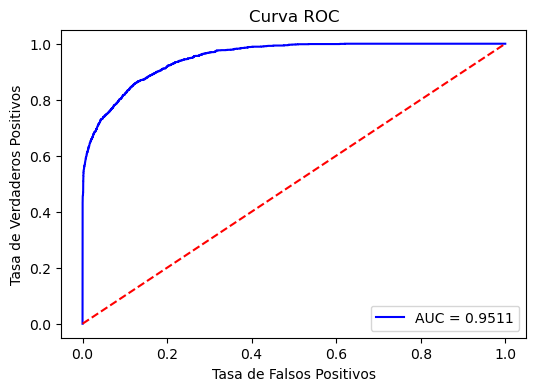

Optimization terminated successfully.
         Current function value: 0.124037
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                80000
Model:                          Logit   Df Residuals:                    79995
Method:                           MLE   Df Model:                            4
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.5735
Time:                        15:42:21   Log-Likelihood:                -9923.0
converged:                       True   LL-Null:                       -23265.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -25.2278      0.296    -85.088      0.000     -25.809     -24.647
a

In [22]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Balancear las clases
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)
# Modelo de regresión logística con scikit-learn
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]
# Coeficientes del modelo
print("Coeficientes del modelo:", log_reg.coef_)
print("Intercepto:", log_reg.intercept_)
# Evaluación del Modelo
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

#Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc_score(y_test, y_prob):.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Modelo con statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
modelo_sm = sm.Logit(y_train, X_train_sm).fit()
print(modelo_sm.summary())


La métrica de Accuracy indica la proporción de predicciones correctas sobre el total, y en este caso, el modelo tiene una exactitud del 86.90%. Esto significa que el modelo acierta en la mayoría de los casos, aunque siempre buscamos valores lo más cercanos posible a 1.

La Precision mide cuántas de las predicciones positivas realmente lo son. En este caso, el valor obtenido es 0.3809, lo que indica que cuando el modelo predice que una persona tiene diabetes, acierta en un 38.09% de las veces.

El Recall evalúa qué porcentaje de los casos positivos son correctamente identificados por el modelo. En este análisis, el recall es de 0.8641, lo cual es clave en un problema de salud como la diabetes, ya que un recall alto reduce la cantidad de falsos negativos, minimizando el riesgo de no detectar casos positivos.

El F1-Score es la media armónica entre precisión y recall, proporcionando un balance entre ambas métricas. En este caso, el F1-Score es 0.5287, lo que indica un equilibrio razonable, aunque hay margen para mejorar.

Finalmente, el AUC-ROC, que mide la capacidad del modelo para diferenciar entre clases, tiene un valor de 0.9511. Esto sugiere que el modelo es bastante efectivo al distinguir entre personas con y sin diabetes.

Se puede obervar que en P>|z| los valores de las variables son cero, esto quiere decir que cada variable tiene impacto importante en la variable dependiente y son significativas individualmente.

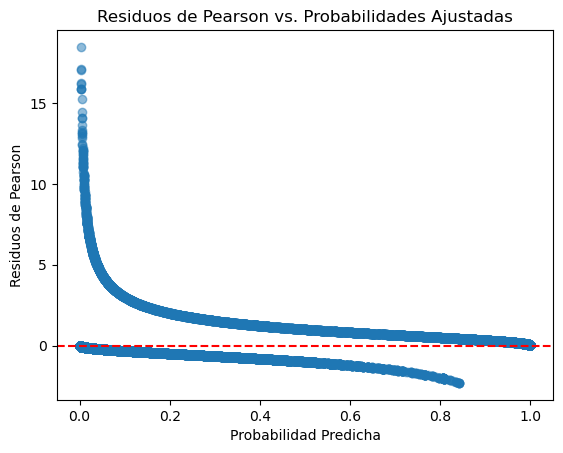

In [23]:
# Gráfico de residuos de Pearson vs. probabilidades predichas
plt.scatter(modelo_sm.predict(X_train_sm), modelo_sm.resid_pearson, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Probabilidad Predicha")
plt.ylabel("Residuos de Pearson")
plt.title("Residuos de Pearson vs. Probabilidades Ajustadas")
plt.show()

Aquí se puede observar que se ajusto muy mal el modelo

In [24]:
#%% Feature importance
names = X_train.columns.to_list()
labels = np.concatenate([names])

perm_importance_random_f = permutation_importance(log_reg, X_train_resampled, y_train_resampled )

perm_feature_importance = pd.DataFrame({'predictor': labels,
                                  'Random Forest': perm_importance_random_f.importances_mean, 
                                  }).sort_values('Random Forest', ascending = False)

perm_feature_importance

,predictor,Random Forest
1,hbA1c_level,0.179427
2,blood_glucose_level,0.102077
0,age,0.071420
3,gender,0.000159


Aqui se puede ver cual es la variable más importante a la menos importante

Concluimos que el modelo es bueno y se trato de hacer todo el tratamiento de datos